# CIS575 Team Project - Home Value Prediction

## About the Zillow Kaggle Dataset

For this project, the team began with the Zillow Kaggle Dataset from here: https://www.kaggle.com/c/zillow-prize-1

Note for the project, we are not attempting the Zillow prize challenge from Kaggle, but rather just utilizing the dataset as the basis for our own analysis.

The base metrics for this dataset:
| Rows    | 2,985,218 |
| Columns | 57        |
| Size    | 633.6 MB  |

The size has proved difficult to handle with some desktop software, so I've moved to Jupyter as a more robust platform to do our initial manipulations in until we have a clean dataset ready for SAS Enterprise Miner.

The benefit of this Jupyter notebook is the linearity of the manipulations and analyis - the group is able to make decisions and implement adjustments at any point in the history and re-run the cells from that point on.  Also, it is easy to re-sequence the ordering of these manipulations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get the monstrosity, only import columns we really want into a pandas dataframe
# limiting to only property type id's of 261 = residential single family homes
iter_csv = pd.read_csv("properties_2016.csv",
                header=0,
                index_col=["parcelid"],
                usecols=["parcelid",
                        "bathroomcnt",
                        "bedroomcnt",
                        "calculatedfinishedsquarefeet",
                        "fullbathcnt",
                        "poolcnt",
                        "lotsizesquarefeet",
                        "propertylandusetypeid",
                        "censustractandblock",
                        "rawcensustractandblock",
                        "yearbuilt",
                        "taxvaluedollarcnt",
                        "roomcnt"],
                encoding="utf-8-sig",
                chunksize=1000)
df = pd.concat([chunk[chunk['propertylandusetypeid']==261] for chunk in iter_csv])

# Show the top 20 cases so we have something to look at
df.head(20)


bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
parcelid                                                                       
10759547          0.0         0.0                           NaN          NaN   
11193347          0.0         0.0                           NaN          NaN   
11215747          0.0         0.0                           NaN          NaN   
11229347          0.0         0.0                           NaN          NaN   
11324547          2.0         4.0                        3633.0          2.0   
11457547          0.0         0.0                           NaN          NaN   
11544747          4.0         3.0                        1620.0          4.0   
11585547          2.0         3.0                        2077.0          2.0   
11660547          0.0         0.0                           NaN          NaN   
11681747          0.0         0.0                           NaN          NaN   
11818747          0.0         0.0                           NaN          NaN   
11954547          0.0         0.0                        1200.0          NaN   
12077147          0.0         0.0                           NaN          NaN   
12167947          0.0         0.0                           NaN          NaN   
12168547          0.0         0.0                           NaN          NaN   
12537947          0.0         0.0                         171.0          NaN   
12559547          0.0         0.0                         203.0          NaN   
12645947          0.0         0.0                           NaN          NaN   
12649147          0.0         0.0                           NaN          NaN   
12716947          1.0         3.0                        1244.0          1.0   

          lotsizesquarefeet  poolcnt  propertylandusetypeid  \
parcelid                                                      
10759547             4083.0      NaN                  261.0   
11193347            11975.0      NaN                  261.0   
11215747             9403.0      NaN                  261.0   
11229347             3817.0      NaN                  261.0   
11324547             9826.0      NaN                  261.0   
11457547              500.0      NaN                  261.0   
11544747                NaN      NaN                  261.0   
11585547             6490.0      NaN                  261.0   
11660547                NaN      NaN                  261.0   
11681747             2902.0      NaN                  261.0   
11818747             5875.0      NaN                  261.0   
11954547             4054.0      NaN                  261.0   
12077147             2111.0      NaN                  261.0   
12167947           145953.0      NaN                  261.0   
12168547             5504.0      NaN                  261.0   
12537947            13002.0      NaN                  261.0   
12559547            17359.0      NaN                  261.0   
12645947             4386.0      NaN                  261.0   
12649147             4648.0      NaN                  261.0   
12716947             6021.0      NaN                  261.0   

          rawcensustractandblock  roomcnt  yearbuilt  taxvaluedollarcnt  \
parcelid                                                                  
10759547            6.037800e+07      0.0        NaN            27516.0   
11193347            6.037910e+07      0.0        NaN               10.0   
11215747            6.037911e+07      0.0        NaN               10.0   
11229347            6.037911e+07      0.0        NaN             2077.0   
11324547            6.037910e+07      0.0     2005.0           291973.0   
11457547            6.037276e+07      0.0        NaN              124.0   
11544747            6.037272e+07      0.0     2011.0           835036.0   
11585547            6.037702e+07      0.0     1926.0           637046.0   
11660547            6.037262e+07      0.0        NaN          6629148.0   
11681747            6.037800e+07     

## The data dictionary for the Zillow dataset

In [2]:
dict_df = pd.read_csv("data_dictionary.csv", encoding='latin1')
dict_df

Feature  \
0          'airconditioningtypeid'   
1       'architecturalstyletypeid'   
2                   'basementsqft'   
3                    'bathroomcnt'   
4                     'bedroomcnt'   
5          'buildingqualitytypeid'   
6            'buildingclasstypeid'   
7              'calculatedbathnbr'   
8                     'decktypeid'   
9            'threequarterbathnbr'   
10      'finishedfloor1squarefeet'   
11  'calculatedfinishedsquarefeet'   
12           'finishedsquarefeet6'   
13          'finishedsquarefeet12'   
14          'finishedsquarefeet13'   
15          'finishedsquarefeet15'   
16          'finishedsquarefeet50'   
17                          'fips'   
18                  'fireplacecnt'   
19                 'fireplaceflag'   
20                   'fullbathcnt'   
21                  'garagecarcnt'   
22               'garagetotalsqft'   
23                'hashottuborspa'   
24         'heatingorsystemtypeid'   
25                      'latitude'   
26                     'longitude'   
27             'lotsizesquarefeet'   
28               'numberofstories'   
29                      'parcelid'   
30                       'poolcnt'   
31                   'poolsizesum'   
32                  'pooltypeid10'   
33                   'pooltypeid2'   
34                   'pooltypeid7'   
35     'propertycountylandusecode'   
36         'propertylandusetypeid'   
37            'propertyzoningdesc'   
38        'rawcensustractandblock'   
39           'censustractandblock'   
40                'regionidcounty'   
41                  'regionidcity'   
42                   'regionidzip'   
43          'regionidneighborhood'   
44                       'roomcnt'   
45                   'storytypeid'   
46        'typeconstructiontypeid'   
47                       'unitcnt'   
48            'yardbuildingsqft17'   
49            'yardbuildingsqft26'   
50                     'yearbuilt'   
51             'taxvaluedollarcnt'   
52    'structuretaxvaluedollarcnt'   
53         'landtaxvaluedollarcnt'   
54                     'taxamount'   
55                'assessmentyear'   
56            'taxdelinquencyflag'   
57            'taxdelinquencyyear'   

                                          Description  
0   Type of cooling system present in the home (if...  
1    Architectural style of the home (i.e. ranch, ...  
2    Finished living area below or partially below...  
3    Number of bathrooms in home including fractio...  
4                         Number of bedrooms in home   
5    Overall assessment of condition of the buildi...  
6   The building framing type (steel frame, wood f...  
7    Number of bathrooms in home including fractio...  
8             Type of deck (if any) present on parcel  
9    Number of 3/4 bathrooms in house (shower + si...  
10   Size of the finished living area on the first...  
11   Calculated total finished living area of the ...  
12                  Base unfinished and finished area  
13                               Finished living area  
14                             Perimeter  living area  
15                                         Total area  
16   Size of the finished living area on the first...  
17   Federal Information Processing Standard code ...  
18            Number of fireplaces in a home (if any)  
19               Is a fireplace present in this home   
20   Number of full bathrooms (sink, shower + bath...  
21   Total number of garages on the lot including ...  
22   Total number of square feet of all garages on...  
23                Does the home have a hot tub or spa  
24                        Type of home heating system  
25   Latitude of the middle of the parcel multipli...  
26   Longitude of the middle of the parcel multipl...  
27                     Area of the lot in square feet  
28           Number of stories or levels the home has  
29              Unique identifier for parcels (lots)   
30                Number of pools on the lot (if

## Clean up pool count variable.

We are going to assert that the pool count variable is accurate.  In other words, if there is a pool count value, then there is a pool - if there is no value, then there is not a pool.  The original import did not fill in 0's for missing values there.

In [3]:
# Need to transform those NaN's for Pool Count

df['poolcnt'].fillna(0, inplace=True)
df.head(20)


bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
parcelid                                                                       
10759547          0.0         0.0                           NaN          NaN   
11193347          0.0         0.0                           NaN          NaN   
11215747          0.0         0.0                           NaN          NaN   
11229347          0.0         0.0                           NaN          NaN   
11324547          2.0         4.0                        3633.0          2.0   
11457547          0.0         0.0                           NaN          NaN   
11544747          4.0         3.0                        1620.0          4.0   
11585547          2.0         3.0                        2077.0          2.0   
11660547          0.0         0.0                           NaN          NaN   
11681747          0.0         0.0                           NaN          NaN   
11818747          0.0         0.0                           NaN          NaN   
11954547          0.0         0.0                        1200.0          NaN   
12077147          0.0         0.0                           NaN          NaN   
12167947          0.0         0.0                           NaN          NaN   
12168547          0.0         0.0                           NaN          NaN   
12537947          0.0         0.0                         171.0          NaN   
12559547          0.0         0.0                         203.0          NaN   
12645947          0.0         0.0                           NaN          NaN   
12649147          0.0         0.0                           NaN          NaN   
12716947          1.0         3.0                        1244.0          1.0   

          lotsizesquarefeet  poolcnt  propertylandusetypeid  \
parcelid                                                      
10759547             4083.0      0.0                  261.0   
11193347            11975.0      0.0                  261.0   
11215747             9403.0      0.0                  261.0   
11229347             3817.0      0.0                  261.0   
11324547             9826.0      0.0                  261.0   
11457547              500.0      0.0                  261.0   
11544747                NaN      0.0                  261.0   
11585547             6490.0      0.0                  261.0   
11660547                NaN      0.0                  261.0   
11681747             2902.0      0.0                  261.0   
11818747             5875.0      0.0                  261.0   
11954547             4054.0      0.0                  261.0   
12077147             2111.0      0.0                  261.0   
12167947           145953.0      0.0                  261.0   
12168547             5504.0      0.0                  261.0   
12537947            13002.0      0.0                  261.0   
12559547            17359.0      0.0                  261.0   
12645947             4386.0      0.0                  261.0   
12649147             4648.0      0.0                  261.0   
12716947             6021.0      0.0                  261.0   

          rawcensustractandblock  roomcnt  yearbuilt  taxvaluedollarcnt  \
parcelid                                                                  
10759547            6.037800e+07      0.0        NaN            27516.0   
11193347            6.037910e+07      0.0        NaN               10.0   
11215747            6.037911e+07      0.0        NaN               10.0   
11229347            6.037911e+07      0.0        NaN             2077.0   
11324547            6.037910e+07      0.0     2005.0           291973.0   
11457547            6.037276e+07      0.0        NaN              124.0   
11544747            6.037272e+07      0.0     2011.0           835036.0   
11585547            6.037702e+07      0.0     1926.0           637046.0   
11660547            6.037262e+07      0.0        NaN          6629148.0   
11681747            6.037800e+07     

In [4]:
# How many rows and columns are we working with at this point
df.shape



(2148362, 12)

Wow. still 2.14 million rows. 

Initial exploration shows that there are extreme homes in this area that don't fit our expectation of typical single family home:
  * Bedrooms: between 1 and 5
  * Bathrooms: between 1 and 5
  * Squarefootage: less than 8,000
  * Lot size: between ~0.10 and 1.5 acres

In [5]:
# Implement filtering based on above expectations for single family home.

# There's probably some way to do this all in-place, but keeping it granular for easy adjustments later.

df = df[(df['bathroomcnt'] > 0) & (df['bathroomcnt'] < 6)]
df = df[(df['bedroomcnt'] > 0) & (df['bedroomcnt'] < 6)]
df = df[df['calculatedfinishedsquarefeet'] < 8000]
df = df[(df['lotsizesquarefeet'] < 65340) & (df['lotsizesquarefeet'] > 4500)]

# TODO - year built?  Limit to 1900+

# get a look at the top of the dataset
df.head(10)

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
parcelid                                                                       
11324547          2.0         4.0                        3633.0          2.0   
11585547          2.0         3.0                        2077.0          2.0   
12716947          1.0         3.0                        1244.0          1.0   
12757147          2.0         3.0                        1300.0          2.0   
12757947          2.0         3.0                        1222.0          2.0   
14358747          3.0         4.0                        2536.0          3.0   
76914347          1.0         2.0                         725.0          1.0   
76914747          2.0         4.0                        2143.0          2.0   
17052152          2.0         3.0                        1800.0          2.0   
17052992          1.0         2.0                         780.0          1.0   

          lotsizesquarefeet  poolcnt  propertylandusetypeid  \
parcelid                                                      
11324547             9826.0      0.0                  261.0   
11585547             6490.0      0.0                  261.0   
12716947             6021.0      0.0                  261.0   
12757147             4917.0      0.0                  261.0   
12757947             5500.0      1.0                  261.0   
14358747             4554.0      0.0                  261.0   
76914347             5649.0      0.0                  261.0   
76914747             5063.0      0.0                  261.0   
17052152            19323.0      0.0                  261.0   
17052992             6900.0      0.0                  261.0   

          rawcensustractandblock  roomcnt  yearbuilt  taxvaluedollarcnt  \
parcelid                                                                  
11324547            6.037910e+07      0.0     2005.0           291973.0   
11585547            6.037702e+07      0.0     1926.0           637046.0   
12716947            6.037503e+07      0.0     1950.0           166927.0   
12757147            6.037553e+07      0.0     1950.0           229763.0   
12757947            6.037553e+07      0.0     1951.0           286129.0   
14358747            6.059052e+07      0.0     2014.0           994000.0   
76914347            6.037110e+07      0.0     1953.0            37548.0   
76914747            6.037901e+07      0.0     1984.0           209415.0   
17052152            6.111001e+07      0.0     1932.0           783000.0   
17052992            6.111001e+07      4.0     1971.0            87400.0   

          censustractandblock  
parcelid                       
11324547                  NaN  
11585547                  NaN  
12716947                  NaN  
12757147                  NaN  
12757947                  NaN  
14358747                  NaN  
76914347                  NaN  
76914747                  NaN  
17052152         6.111001e+13  
17052992         6.111001e+13

In [6]:
df.shape

(1872390, 12)

## Provide a normalized version of the target variable

At this point in time, the project is to model predicted home values in such a way we can identify the most "valuable" properties. There is some discussion as how to identify "value".  We are going to use price per square foot as a way to normalize home value across the dataset.

In [7]:
# Add column for value per square foot.
df['dollar_per_sqft'] = df['taxvaluedollarcnt'] / df['calculatedfinishedsquarefeet']
df.head(10)

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
parcelid                                                                       
11324547          2.0         4.0                        3633.0          2.0   
11585547          2.0         3.0                        2077.0          2.0   
12716947          1.0         3.0                        1244.0          1.0   
12757147          2.0         3.0                        1300.0          2.0   
12757947          2.0         3.0                        1222.0          2.0   
14358747          3.0         4.0                        2536.0          3.0   
76914347          1.0         2.0                         725.0          1.0   
76914747          2.0         4.0                        2143.0          2.0   
17052152          2.0         3.0                        1800.0          2.0   
17052992          1.0         2.0                         780.0          1.0   

          lotsizesquarefeet  poolcnt  propertylandusetypeid  \
parcelid                                                      
11324547             9826.0      0.0                  261.0   
11585547             6490.0      0.0                  261.0   
12716947             6021.0      0.0                  261.0   
12757147             4917.0      0.0                  261.0   
12757947             5500.0      1.0                  261.0   
14358747             4554.0      0.0                  261.0   
76914347             5649.0      0.0                  261.0   
76914747             5063.0      0.0                  261.0   
17052152            19323.0      0.0                  261.0   
17052992             6900.0      0.0                  261.0   

          rawcensustractandblock  roomcnt  yearbuilt  taxvaluedollarcnt  \
parcelid                                                                  
11324547            6.037910e+07      0.0     2005.0           291973.0   
11585547            6.037702e+07      0.0     1926.0           637046.0   
12716947            6.037503e+07      0.0     1950.0           166927.0   
12757147            6.037553e+07      0.0     1950.0           229763.0   
12757947            6.037553e+07      0.0     1951.0           286129.0   
14358747            6.059052e+07      0.0     2014.0           994000.0   
76914347            6.037110e+07      0.0     1953.0            37548.0   
76914747            6.037901e+07      0.0     1984.0           209415.0   
17052152            6.111001e+07      0.0     1932.0           783000.0   
17052992            6.111001e+07      4.0     1971.0            87400.0   

          censustractandblock  dollar_per_sqft  
parcelid                                        
11324547                  NaN        80.366914  
11585547                  NaN       306.714492  
12716947                  NaN       134.185691  
12757147                  NaN       176.740769  
12757947                  NaN       234.148118  
14358747                  NaN       391.955836  
76914347                  NaN        51.790345  
76914747                  NaN        97.720485  
17052152         6.111001e+13       435.000000  
17052992         6.111001e+13       112.051282

## Explore our normalized (continuous) variable:

In [8]:
pd.options.display.float_format = '{:.5f}'.format
df['dollar_per_sqft'].describe()

count   1872328.00000
mean        215.78992
std         660.96954
min           0.00492
25%         114.57352
50%         190.55768
75%         280.01861
max      600000.00000
Name: dollar_per_sqft, dtype: float64

Clearly some values that don't make sense.  Max at 600,000 / sq ft.  Sus
We'll impose a cutoff here to try to remove these unusual / extreme cases.


This seems more inline with our expectations of "normal houses"

Looking at it graphically:

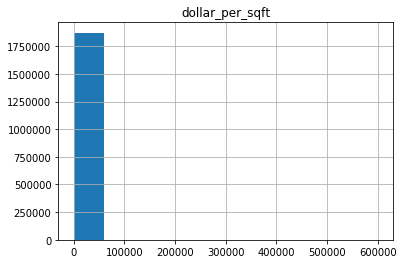

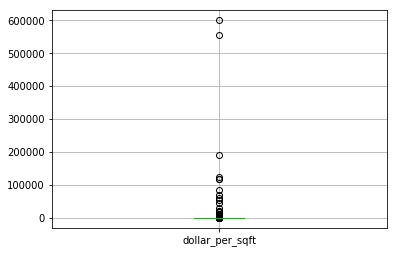

In [9]:
plt.gcf().clear()
df.hist(column=['dollar_per_sqft'])
plt.show()
df.boxplot(column=['dollar_per_sqft'])
plt.show()

## Deal with outliers
The above graphs show some remarkable outliers for our dollar_per_sqft variable.

As the business case if focused on finding high-value investment grade single family homes, a property at 600,000.00 per square foot is not in our target demographic.  The box graph shows this is not the only remarkable outlier.

We will prune the dataset to cap at $ 1000.00 / sq ft and look again.

Also noted there were some very small (less than $1.00 per sq ft) values.  We are also going to discard anything less than $ 10.00 / square ft as being illogical data for the dataset.

In [10]:
df = df[df['dollar_per_sqft'] < 1000]
df = df[df['dollar_per_sqft'] > 10]
df['dollar_per_sqft'].describe()


count   1866025.00000
mean        210.51597
std         135.33208
min          10.03567
25%         114.25267
50%         190.07660
75%         278.90078
max         999.93419
Name: dollar_per_sqft, dtype: float64

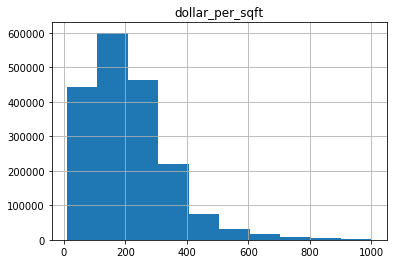

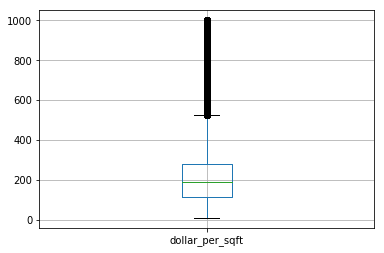

In [11]:
plt.gcf().clear()
df.hist(column=['dollar_per_sqft'])
plt.show()
df.boxplot(column=['dollar_per_sqft'])
plt.show()

This looks more balanced, but still a left skewed distribution.

Consider if we used a log transformation here.  

NOTE: The log transformation won't actually change the binary target variable generated below, but it will help "squash" the extremely wide range of values for our visualization purposed.

In [12]:
import math
df['log_dollar_sqft'] = np.log(df['dollar_per_sqft'])
df['log_dollar_sqft'].describe()

count   1866025.00000
mean          5.12768
std           0.71205
min           2.30615
25%           4.73841
50%           5.24743
75%           5.63086
max           6.90769
Name: log_dollar_sqft, dtype: float64

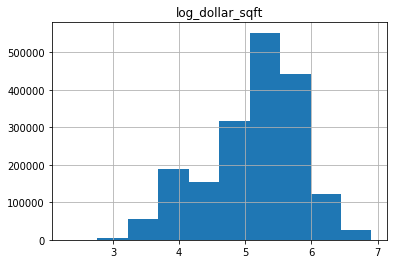

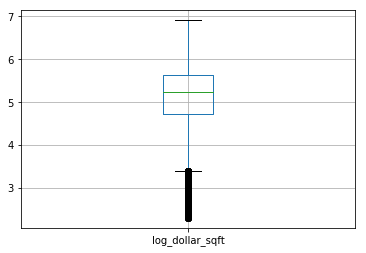

In [13]:
plt.gcf().clear()
df.hist(column=['log_dollar_sqft'])
plt.show()
df.boxplot(column=['log_dollar_sqft'])
plt.show()

## Generate the binary target variable

The business case is to be able to predict which properties fall into the upper quartile of home values.  We will generate binary variables for use in SAS Enterprise Miner.


In [14]:
q_limit_b = df['dollar_per_sqft'].quantile(0.75)

def target_b_func(row):
    if row['dollar_per_sqft'] > q_limit_b:
        return 1
    else:
        return 0
    
df['target_b_25'] = df.apply(target_b_func, axis=1)
df['target_b_25'].describe()

count   1866025.00000
mean          0.25000
std           0.43301
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: target_b_25, dtype: float64

## Provide an alternate target variable that is more selective
The team began the project with the idea of identifying the upper quartile of "valuable" single family homes. However, further discussion provoked the idea that the top 25% may not be selective enough. Decided to also include a binary target reflecting top 10%.

In [15]:
q_limit_b = df['dollar_per_sqft'].quantile(0.90)
    
df['target_b_10'] = df.apply(target_b_func, axis=1)
df['target_b_10'].describe()

count   1866025.00000
mean          0.10000
std           0.30000
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: target_b_10, dtype: float64

## Derive "Open-ness" Variable

The team wanted to consider the "open-ness" of a particular property and will derive a variable to use as a measure fo this.  

We will use finished square feet per (bedroom + bathroom count).

In [16]:
# Derive open-ness variable
df['sq_ft_per_room'] = df['calculatedfinishedsquarefeet'] / ( df['bedroomcnt'] + df['bathroomcnt'] )
df.head(10)

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
parcelid                                                                       
11324547      2.00000     4.00000                    3633.00000      2.00000   
11585547      2.00000     3.00000                    2077.00000      2.00000   
12716947      1.00000     3.00000                    1244.00000      1.00000   
12757147      2.00000     3.00000                    1300.00000      2.00000   
12757947      2.00000     3.00000                    1222.00000      2.00000   
14358747      3.00000     4.00000                    2536.00000      3.00000   
76914347      1.00000     2.00000                     725.00000      1.00000   
76914747      2.00000     4.00000                    2143.00000      2.00000   
17052152      2.00000     3.00000                    1800.00000      2.00000   
17052992      1.00000     2.00000                     780.00000      1.00000   

          lotsizesquarefeet  poolcnt  propertylandusetypeid  \
parcelid                                                      
11324547         9826.00000  0.00000              261.00000   
11585547         6490.00000  0.00000              261.00000   
12716947         6021.00000  0.00000              261.00000   
12757147         4917.00000  0.00000              261.00000   
12757947         5500.00000  1.00000              261.00000   
14358747         4554.00000  0.00000              261.00000   
76914347         5649.00000  0.00000              261.00000   
76914747         5063.00000  0.00000              261.00000   
17052152        19323.00000  0.00000              261.00000   
17052992         6900.00000  0.00000              261.00000   

          rawcensustractandblock  roomcnt  yearbuilt  taxvaluedollarcnt  \
parcelid                                                                  
11324547          60379102.06110  0.00000 2005.00000       291973.00000   
11585547          60377022.01400  0.00000 1926.00000       637046.00000   
12716947          60375027.00400  0.00000 1950.00000       166927.00000   
12757147          60375530.00200  0.00000 1950.00000       229763.00000   
12757947          60375530.00402  0.00000 1951.00000       286129.00000   
14358747          60590524.26208  0.00000 2014.00000       994000.00000   
76914347          60371095.00201  0.00000 1953.00000        37548.00000   
76914747          60379012.10105  0.00000 1984.00000       209415.00000   
17052152          61110009.03202  0.00000 1932.00000       783000.00000   
17052992          61110010.02402  4.00000 1971.00000        87400.00000   

          censustractandblock  dollar_per_sqft  log_dollar_sqft  target_b_25  \
parcelid                                                                       
11324547                  nan         80.36691          4.38660            0   
11585547                  nan        306.71449          5.72592            1   
12716947                  nan        134.18569          4.89922            0   
12757147                  nan        176.74077          5.17468            0   
12757947                  nan        234.14812          5.45595            0   
14358747                  nan        391.95584          5.97115            1   
76914347                  nan         51.79034          3.94720            0   
76914747                  nan         97.72049          4.58211            0   
17052152 61110009032019.00000        435.00000          6.07535            1   
17052992 61110010024015.00000        112.05128          4.71896            0   

          target_b_10  sq_ft_per_room  
parcelid                               
11324547            0       605.50000  
11585547            0       415.40000  
12716947            0       311.00000  
12757147            0       260.00000  
12757947            0       244.40000  
14358747            1       362.28571  
76914347            0       241.66667  
76914747            0       357.16667  
17052152            1       36

## Reduce Year Built to Decade Built

In [17]:
# Reduce year built to decade built
df['decade_built'] = df['yearbuilt'] / 10
df['decade_built'] = df['decade_built'].apply(np.floor)
df.head(10)

# get rid of year, we won't use it again.
df.drop('yearbuilt', axis=1, inplace=True)

In [18]:
df['census_block'] = df['rawcensustractandblock'].astype(int)
df.head(5)

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
parcelid                                                                       
11324547      2.00000     4.00000                    3633.00000      2.00000   
11585547      2.00000     3.00000                    2077.00000      2.00000   
12716947      1.00000     3.00000                    1244.00000      1.00000   
12757147      2.00000     3.00000                    1300.00000      2.00000   
12757947      2.00000     3.00000                    1222.00000      2.00000   

          lotsizesquarefeet  poolcnt  propertylandusetypeid  \
parcelid                                                      
11324547         9826.00000  0.00000              261.00000   
11585547         6490.00000  0.00000              261.00000   
12716947         6021.00000  0.00000              261.00000   
12757147         4917.00000  0.00000              261.00000   
12757947         5500.00000  1.00000              261.00000   

          rawcensustractandblock  roomcnt  taxvaluedollarcnt  \
parcelid                                                       
11324547          60379102.06110  0.00000       291973.00000   
11585547          60377022.01400  0.00000       637046.00000   
12716947          60375027.00400  0.00000       166927.00000   
12757147          60375530.00200  0.00000       229763.00000   
12757947          60375530.00402  0.00000       286129.00000   

          censustractandblock  dollar_per_sqft  log_dollar_sqft  target_b_25  \
parcelid                                                                       
11324547                  nan         80.36691          4.38660            0   
11585547                  nan        306.71449          5.72592            1   
12716947                  nan        134.18569          4.89922            0   
12757147                  nan        176.74077          5.17468            0   
12757947                  nan        234.14812          5.45595            0   

          target_b_10  sq_ft_per_room  decade_built  census_block  
parcelid                                                           
11324547            0       605.50000     200.00000      60379102  
11585547            0       415.40000     192.00000      60377022  
12716947            0       311.00000     195.00000      60375027  
12757147            0       260.00000     195.00000      60375530  
12757947            0       244.40000     195.00000      60375530

## Distance to Nearest In-N-Out Burger !
The team wanted to expolore the introduction of (seemingly) non-related variables into the model. One will be the distance to the nearest In-N-Out Burger.

We used Python to generate the haversine distance (as-the-crow flies distance) between each property and the nearest In-N-Out Burger location.  The script is found in this same Git repository - See: _in_n_out_burger_distance.py_.

Here we will grab the output of the script and join it to the existing dataframe.

In [19]:
burger_df = pd.read_csv("distance_to_burger.csv",
                       index_col=["parcel_id"])
burger_df.head(10)


/home/vschmidt/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


distance_mi  store_id
parcel_id                       
10759547       6.30649       206
11193347       3.17414        79
11215747      10.13002        79
11229347       9.18108        79
11324547       4.38719        79
11457547       1.34449       117
11544747       0.91425       140
11585547       3.85592       140
11660547       3.92111       119
11681747      12.78929       297

In [20]:
burger_df.shape

(2148362, 2)

In [21]:
df = pd.concat([df, burger_df], axis=1, join='inner')
del burger_df
df.head(10)

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
11324547      2.00000     4.00000                    3633.00000      2.00000   
11585547      2.00000     3.00000                    2077.00000      2.00000   
12716947      1.00000     3.00000                    1244.00000      1.00000   
12757147      2.00000     3.00000                    1300.00000      2.00000   
12757947      2.00000     3.00000                    1222.00000      2.00000   
14358747      3.00000     4.00000                    2536.00000      3.00000   
76914347      1.00000     2.00000                     725.00000      1.00000   
76914747      2.00000     4.00000                    2143.00000      2.00000   
17052152      2.00000     3.00000                    1800.00000      2.00000   
17052992      1.00000     2.00000                     780.00000      1.00000   

          lotsizesquarefeet  poolcnt  propertylandusetypeid  \
11324547         9826.00000  0.00000              261.00000   
11585547         6490.00000  0.00000              261.00000   
12716947         6021.00000  0.00000              261.00000   
12757147         4917.00000  0.00000              261.00000   
12757947         5500.00000  1.00000              261.00000   
14358747         4554.00000  0.00000              261.00000   
76914347         5649.00000  0.00000              261.00000   
76914747         5063.00000  0.00000              261.00000   
17052152        19323.00000  0.00000              261.00000   
17052992         6900.00000  0.00000              261.00000   

          rawcensustractandblock  roomcnt  taxvaluedollarcnt  \
11324547          60379102.06110  0.00000       291973.00000   
11585547          60377022.01400  0.00000       637046.00000   
12716947          60375027.00400  0.00000       166927.00000   
12757147          60375530.00200  0.00000       229763.00000   
12757947          60375530.00402  0.00000       286129.00000   
14358747          60590524.26208  0.00000       994000.00000   
76914347          60371095.00201  0.00000        37548.00000   
76914747          60379012.10105  0.00000       209415.00000   
17052152          61110009.03202  0.00000       783000.00000   
17052992          61110010.02402  4.00000        87400.00000   

          censustractandblock  dollar_per_sqft  log_dollar_sqft  target_b_25  \
11324547                  nan         80.36691          4.38660            0   
11585547                  nan        306.71449          5.72592            1   
12716947                  nan        134.18569          4.89922            0   
12757147                  nan        176.74077          5.17468            0   
12757947                  nan        234.14812          5.45595            0   
14358747                  nan        391.95584          5.97115            1   
76914347                  nan         51.79034          3.94720            0   
76914747                  nan         97.72049          4.58211            0   
17052152 61110009032019.00000        435.00000          6.07535            1   
17052992 61110010024015.00000        112.05128          4.71896            0   

          target_b_10  sq_ft_per_room  decade_built  census_block  \
11324547            0       605.50000     200.00000      60379102   
11585547            0       415.40000     192.00000      60377022   
12716947            0       311.00000     195.00000      60375027   
12757147            0       260.00000     195.00000      60375530   
12757947            0       244.40000     195.00000      60375530   
14358747            1       362.28571     201.00000      60590524   
76914347            0       241.66667     195.00000      60371095   
76914747            0       357.16667     198.00000      60379012   
17052152            1       360.00000     193.00000      61110009   
17052992            0       260.00000     197.00000      61110010   

          distance_mi  store_id  
11324547      4.38719        79  
11585547      3.85592

## Join the Census educational attainment per capita data


In [22]:
census_df = pd.read_csv("census_education_data.csv")
census_df.drop('block_id', axis=1, inplace=True)
census_df.head(20)

UID  adjusted_block  total  associates_cnt  bachelors_cnt  masters_cnt  \
0     1        60371011   1258             145            117          146   
1     2        60371011   1134             146            146           14   
2     3        60371011    909             134            119           29   
3     4        60371011   1680             144            258          178   
4     5        60371011    893             169            203           16   
5     6        60371012   1798             162            107           56   
6     7        60371012   2240             267            356           65   
7     8        60371012    766              58            136           23   
8     9        60371012   1475             127            167           99   
9    10        60371013   1020              93            204          100   
10   11        60371013    865             138            241           80   
11   12        60371013    874             133            154           36   
12   13        60371013    783              82            124           69   
13   14        60371014    802             130             46           12   
14   15        60371014   1199             157            232          103   
15   16        60371014    936             122            231          111   
16   17        60371021   1486             137            369          104   
17   18        60371021   1451             137            446          178   
18   19        60371021   1083             103            235          189   
19   20        60371021    526              56             73            7   

    doctor_cnt  
0           49  
1           12  
2            7  
3           16  
4           18  
5           31  
6           41  
7            0  
8            0  
9           21  
10          19  
11           0  
12           0  
13           0  
14           0  
15          10  
16          50  
17           9  
18           0  
19           0

In [23]:
## Census data is finer grained than the Zillow.
## Need to group and sum using the Zillow block id format
census_df = census_df.groupby('adjusted_block').sum()
census_df.reset_index()

census_df['new_idx'] = range(1, len(census_df) + 1)
census_df['associates_per_cap'] = census_df['associates_cnt'] / census_df['total']
census_df['bachelors_per_cap'] = census_df['bachelors_cnt'] / census_df['total']
census_df['masters_per_cap'] = census_df['masters_cnt'] / census_df['total']
census_df['doctorates_per_cap'] = census_df['doctor_cnt'] / census_df['total']
pd.options.display.float_format = '{:.3f}'.format
census_df.to_csv("census_data.csv")
census_df = pd.read_csv("census_data.csv",
                       index_col=["UID"])

# Drop the variables we don't need going forward
census_df.drop('associates_cnt', axis=1, inplace=True)
census_df.drop('bachelors_cnt', axis=1, inplace=True)
census_df.drop('masters_cnt', axis=1, inplace=True)
census_df.drop('doctor_cnt', axis=1, inplace=True )
census_df.drop('total', axis=1, inplace=True)


census_df.head(20)

adjusted_block  new_idx  associates_per_cap  bachelors_per_cap  \
UID                                                                    
15          60371011        1               0.126              0.144   
30          60371012        2               0.098              0.122   
46          60371013        3               0.126              0.204   
45          60371014        4               0.139              0.173   
140         60371021        5               0.071              0.231   
189         60371031        6               0.112              0.184   
96          60371032        7               0.057              0.163   
69          60371033        8               0.062              0.301   
190         60371034        9               0.075              0.196   
455         60371041       10               0.061              0.140   
378         60371042       11               0.056              0.049   
427         60371043       12               0.013              0.045   
405         60371044       13               0.018              0.062   
143         60371045       14               0.053              0.027   
298         60371046       15               0.032              0.028   
477         60371047       16               0.058              0.076   
513         60371048       17               0.044              0.057   
270         60371060       18               0.069              0.113   
764         60371061       19               0.062              0.159   
1378        60371064       20               0.058              0.100   

      masters_per_cap  doctorates_per_cap  
UID                                        
15              0.065               0.017  
30              0.039               0.011  
46              0.080               0.011  
45              0.077               0.003  
140             0.075               0.007  
189             0.045               0.006  
96              0.062               0.009  
69              0.061               0.025  
190             0.050               0.009  
455             0.038               0.001  
378             0.011               0.002  
427             0.011               0.002  
405             0.007               0.000  
143             0.008               0.000  
298             0.007               0.000  
477             0.022               0.002  
513             0.007               0.000  
270             0.047               0.008  
764             0.035               0.004  
1378            0.025               0.002

In [24]:
df = pd.merge(left=df, right=census_df, how = 'left', left_on = 'census_block', right_on='adjusted_block')
df.drop('new_idx', axis=1, inplace=True)
df.head(20)

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
0         2.000       4.000                      3633.000        2.000   
1         2.000       3.000                      2077.000        2.000   
2         1.000       3.000                      1244.000        1.000   
3         2.000       3.000                      1300.000        2.000   
4         2.000       3.000                      1222.000        2.000   
5         3.000       4.000                      2536.000        3.000   
6         1.000       2.000                       725.000        1.000   
7         2.000       4.000                      2143.000        2.000   
8         2.000       3.000                      1800.000        2.000   
9         1.000       2.000                       780.000        1.000   
10        1.000       2.000                      1404.000        1.000   
11        2.000       3.000                      1505.000        2.000   
12        2.000       3.000                      1181.000        2.000   
13        3.000       4.000                      2025.000        3.000   
14        2.500       4.000                      1620.000        2.000   
15        2.500       3.000                      2148.000        2.000   
16        4.000       4.000                      2840.000        4.000   
17        3.500       5.000                      3541.000        3.000   
18        5.000       4.000                      3760.000        5.000   
19        1.000       2.000                      1089.000        1.000   

    lotsizesquarefeet  poolcnt  propertylandusetypeid  rawcensustractandblock  \
0            9826.000    0.000                261.000            60379102.061   
1            6490.000    0.000                261.000            60377022.014   
2            6021.000    0.000                261.000            60375027.004   
3            4917.000    0.000                261.000            60375530.002   
4            5500.000    1.000                261.000            60375530.004   
5            4554.000    0.000                261.000            60590524.262   
6            5649.000    0.000                261.000            60371095.002   
7            5063.000    0.000                261.000            60379012.101   
8           19323.000    0.000                261.000            61110009.032   
9            6900.000    0.000                261.000            61110010.024   
10           7500.000    0.000                261.000            61110010.024   
11          10383.000    0.000                261.000            61110010.021   
12          13539.000    0.000                261.000            61110010.022   
13          10752.000    0.000                261.000            61110010.022   
14           8531.000    1.000                261.000            61110010.022   
15          22978.000    0.000                261.000            61110010.023   
16          60548.000    1.000                261.000            61110009.012   
17          63162.000    0.000                261.000            61110009.011   
18          42688.000    1.000                261.000            61110009.011   
19           6661.000    0.000                261.000            61110009.031   

    roomcnt  taxvaluedollarcnt         ...          sq_ft_per_room  \
0     0.000         291973.000         ...                 605.500   
1     0.000         637046.000         ...                 415.400   
2     0.000         166927.000         ...                 311.000   
3     0.000         229763.000         ...                 260.000   
4     0.000         286129.000         ...                 244.400   
5     0.000         994000.000         ...                 362.286   
6     0.000          37548.000         ...                 241.667   
7     0.000         209415.000         ...                 357.167   
8     0.000         783000.000         ...                 360.000   
9     4.000          87400.000         ...     

## Generate statistical summary data

In [25]:
# Drop anything else we don't need
df.drop( 'propertylandusetypeid', axis=1, inplace=True)
df.drop( 'census_block', axis=1, inplace=True)
df.drop( 'taxvaluedollarcnt', axis=1, inplace=True)
df.drop( 'rawcensustractandblock', axis=1, inplace=True)
df.drop( 'censustractandblock', axis=1, inplace=True )
df.drop( 'adjusted_block', axis=1, inplace=True)

df.rename( columns={'poolcnt':'has_pool'}, inplace=True)


# Generate statistical summary data 
pd.options.display.float_format = '{:.2f}'.format
df.describe()

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
count   1866025.00  1866025.00                    1866025.00   1865460.00   
mean          2.18        3.30                       1817.16         2.14   
std           0.85        0.83                        785.04         0.83   
min           0.50        1.00                        102.00         1.00   
25%           2.00        3.00                       1268.00         2.00   
50%           2.00        3.00                       1618.00         2.00   
75%           3.00        4.00                       2176.00         3.00   
max           5.50        5.00                       7999.00         5.00   

       lotsizesquarefeet   has_pool    roomcnt  dollar_per_sqft  \
count         1866025.00 1866025.00 1866023.00       1866025.00   
mean             8629.65       0.19       1.86           210.52   
std              5943.33       0.39       3.14           135.33   
min              4501.00       0.00       0.00            10.04   
25%              6000.00       0.00       0.00           114.25   
50%              6999.00       0.00       0.00           190.08   
75%              8661.00       0.00       5.00           278.90   
max             65339.00       1.00      96.00           999.93   

       log_dollar_sqft  target_b_25  target_b_10  sq_ft_per_room  \
count       1866025.00   1866025.00   1866025.00      1866025.00   
mean              5.13         0.25         0.10          327.81   
std               0.71         0.43         0.30           83.56   
min               2.31         0.00         0.00           23.43   
25%               4.74         0.00         0.00          268.00   
50%               5.25         0.00         0.00          312.60   
75%               5.63         0.00         0.00          371.44   
max               6.91         1.00         1.00         3862.50   

       decade_built  distance_mi   store_id  associates_per_cap  \
count    1865277.00   1866025.00 1866025.00          1865907.00   
mean         195.53         3.58      98.16                0.08   
std            2.08         2.68      82.88                0.02   
min          180.00         0.00       1.00                0.00   
25%          194.00         2.03      32.00                0.06   
50%          195.00         3.01      75.00                0.08   
75%          197.00         4.35     157.00                0.09   
max          201.00        45.86     310.00                0.17   

       bachelors_per_cap  masters_per_cap  doctorates_per_cap  
count         1865907.00       1865907.00          1865907.00  
mean                0.22             0.08                0.01  
std                 0.10             0.05                0.02  
min                 0.00             0.00                0.00  
25%                 0.13             0.04                0.00  
50%                 0.22             0.08                0.01  
75%                 0.30             0.12                0.02  
max                 0.59             0.25                0.21

## Quick visualization of what we've got

### NOTE: if image is small in browser, you can right-click on it and choose "show image" or whatever the equivalent is in your browser to see a bigger version.  Jupyter notebook images are often scaled to fit browser / cell and hard to read.

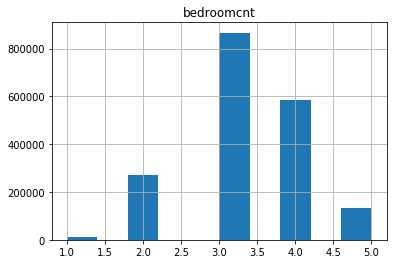

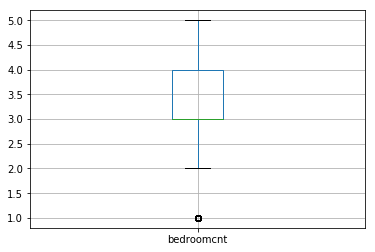

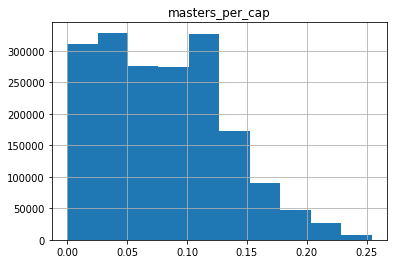

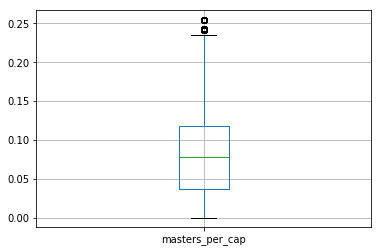

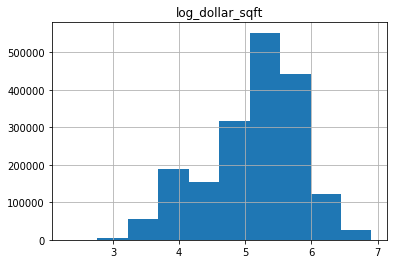

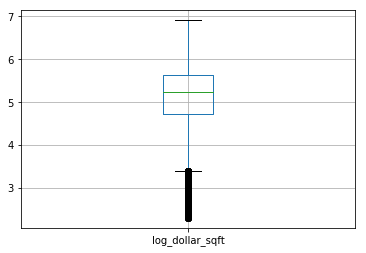

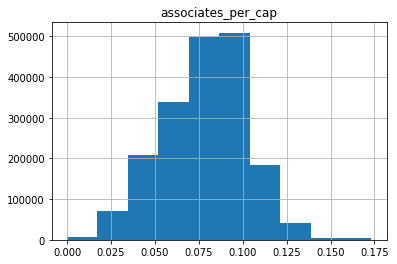

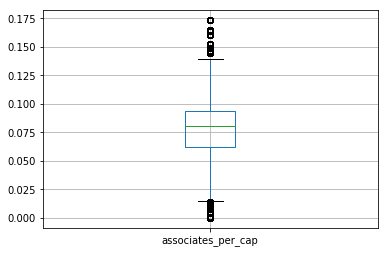

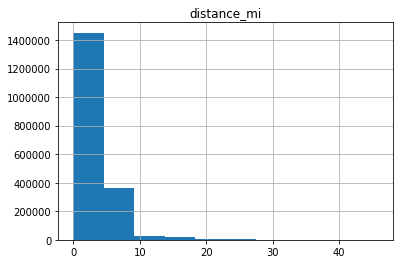

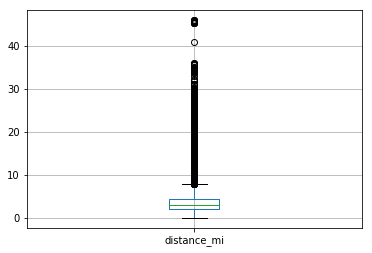

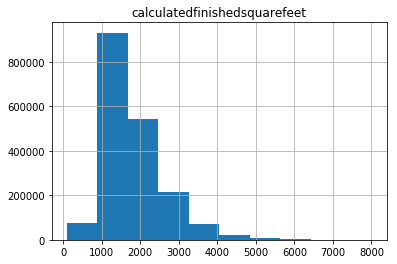

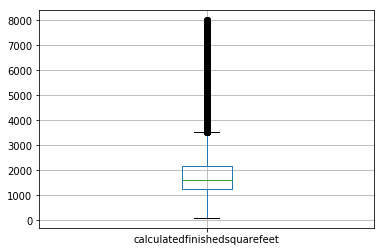

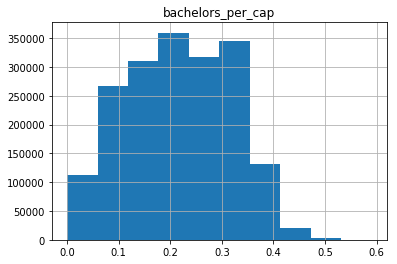

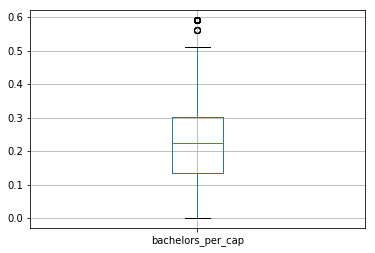

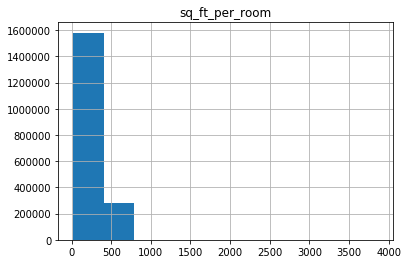

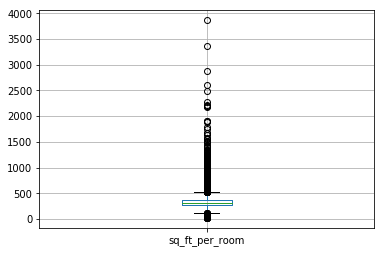

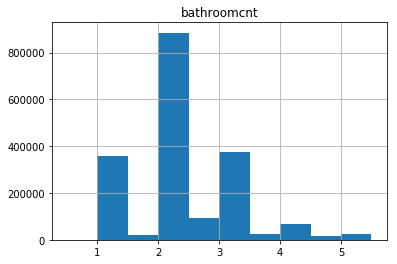

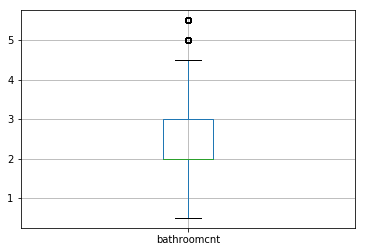

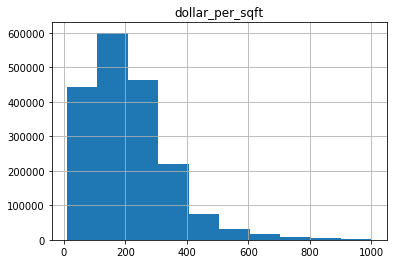

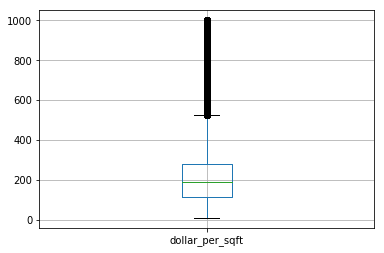

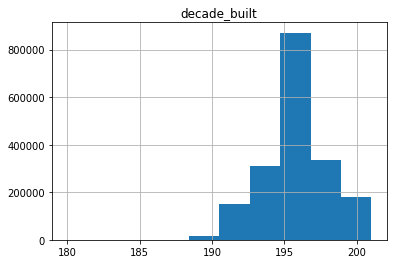

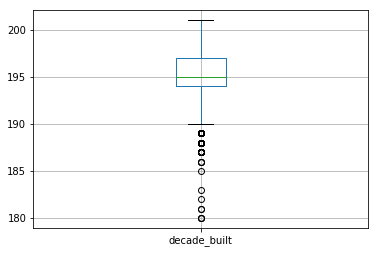

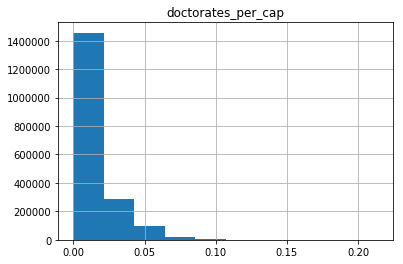

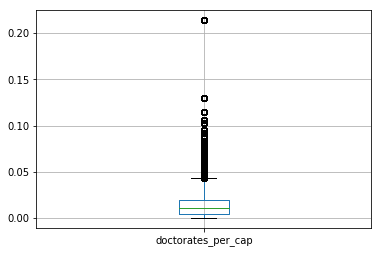

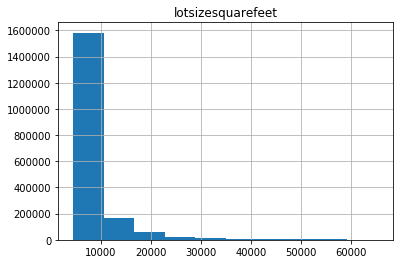

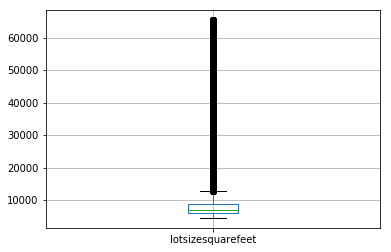

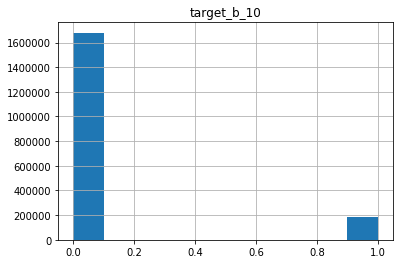

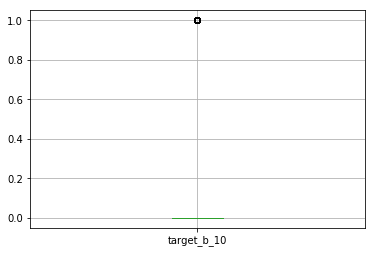

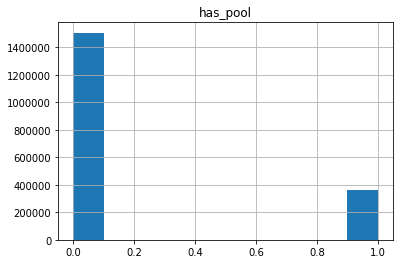

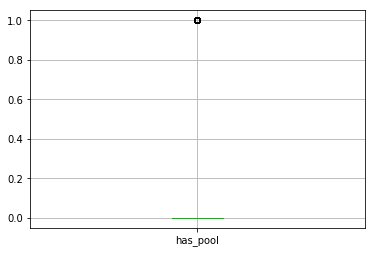

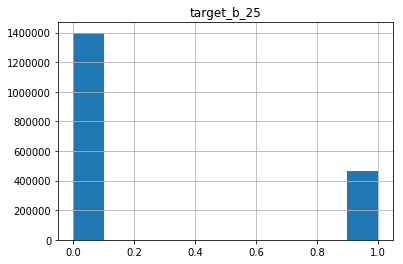

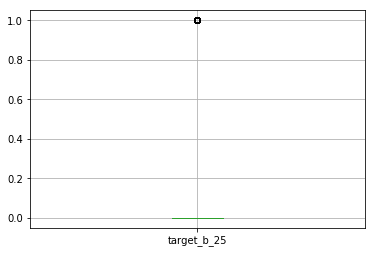

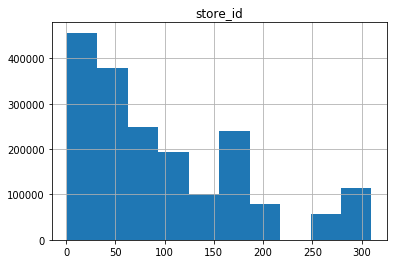

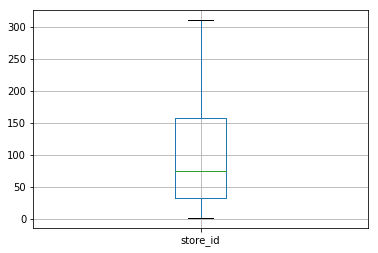

In [26]:
plt.gcf().clear()
for col in {'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet',
           'has_pool', 'dollar_per_sqft', 'log_dollar_sqft', 'target_b_10', 'target_b_25', 'sq_ft_per_room',
           'decade_built', 'distance_mi', 'store_id', 'associates_per_cap', 'bachelors_per_cap',
           'masters_per_cap', 'doctorates_per_cap'}:
    df.hist(column=[col])
    plt.show()
    df.boxplot(column=[col])
    plt.show()

# Produce a smaller random sample of this dataset for Enterprise Miner

At this point the dataset is still huge, and we are running into some operations taking a long time on Enterprise Miner - so produce a sampling of 200,000 random cases.

In [27]:
# produce randomized sampling of larger dataset.
# Can be adjusted later if needed.

sample_size = 200000 # 200,000
df1 = df.sample( sample_size )
df2 = df.sample( 20000 )
df3 = df.sample( 40000 )

## Export a CSV file for use in Enterprise Miner from here.


In [28]:
# Export sample to new CSV for Enterprise Miner
df.to_csv("dataset_for_em_all.csv")
df1.to_csv("dataset_for_em_200k.csv")
df2.to_csv("dataset_for_em_20k.csv")
df3.to_csv("dataset_for_em_40k.csv")

## Create a balanced dataset - might be useful downstream
If we end up using the binary target in upper quartile (target_b_25) - there should be plenty of target cases (1 out 4) to where there would no justification in needing to increase the representation of target cases in the dataset.

However, if we choose to go with the 10% target, the number of primary event cases would become 1 in 10.  However, we have a huge dataset, so this is likely a non-issue.

But, just in case, it might prove useful to have a balanced dataset downstream in Enterprise Miner.  Create that now.

In [29]:
sample_size = 20000
df_primary = df[df['target_b_10'] == 1]
df_non_primary = df[df['target_b_10'] == 0]
df_primary = df_primary.sample(sample_size//2)
df_non_primary = df_non_primary.sample(sample_size//2)
df_balanced = pd.concat([df_primary, df_non_primary])
df_balanced.to_csv("dataset_for_em_20k_balanced_top_10_percent.csv")

## Generate statistical summary for our reduced (20k records) dataset
Since we are sampling the entire dataset to create a 'digestable size' set for enterprise miner, let's take a look at the results and make sure they are in-line with expectations. 

In [30]:
# Generate statistical summary data 
pd.options.display.float_format = '{:.2f}'.format
df2.describe()

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  fullbathcnt  \
count     20000.00    20000.00                      20000.00     19995.00   
mean          2.18        3.29                       1811.74         2.14   
std           0.85        0.82                        771.31         0.83   
min           1.00        1.00                        358.00         1.00   
25%           2.00        3.00                       1272.00         2.00   
50%           2.00        3.00                       1622.00         2.00   
75%           3.00        4.00                       2165.00         3.00   
max           5.50        5.00                       7310.00         5.00   

       lotsizesquarefeet  has_pool  roomcnt  dollar_per_sqft  log_dollar_sqft  \
count           20000.00  20000.00 20000.00         20000.00         20000.00   
mean             8620.89      0.19     1.87           210.64             5.13   
std              5892.97      0.39     3.17           136.30             0.71   
min              4501.00      0.00     0.00            11.91             2.48   
25%              6000.00      0.00     0.00           113.88             4.74   
50%              7000.00      0.00     0.00           189.49             5.24   
75%              8627.25      0.00     5.00           279.44             5.63   
max             64904.00      1.00    77.00           999.73             6.91   

       target_b_25  target_b_10  sq_ft_per_room  decade_built  distance_mi  \
count     20000.00     20000.00        20000.00      19990.00     20000.00   
mean          0.25         0.10          327.69        195.52         3.63   
std           0.43         0.30           82.70          2.08         2.74   
min           0.00         0.00          141.00        188.00         0.08   
25%           0.00         0.00          267.80        194.00         2.05   
50%           0.00         0.00          312.55        195.00         3.02   
75%           1.00         0.00          370.62        197.00         4.39   
max           1.00         1.00         1100.00        201.00        35.86   

       store_id  associates_per_cap  bachelors_per_cap  masters_per_cap  \
count  20000.00            19999.00           19999.00         19999.00   
mean      97.75                0.08               0.22             0.08   
std       82.56                0.02               0.10             0.05   
min        1.00                0.00               0.00             0.00   
25%       32.00                0.06               0.13             0.04   
50%       75.00                0.08               0.22             0.08   
75%      157.00                0.09               0.30             0.12   
max      310.00                0.17               0.51             0.25   

       doctorates_per_cap  
count            19999.00  
mean                 0.01  
std                  0.02  
min                  0.00  
25%                  0.00  
50%                  0.01  
75%                  0.02  
max                  0.21